In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 2.4
N= 100  : pi= 3.32
N= 1000  : pi= 3.112
N= 10000  : pi= 3.156
N= 100000  : pi= 3.13388
N= 1000000  : pi= 3.138392


N= 10000000  : pi= 3.1428208


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

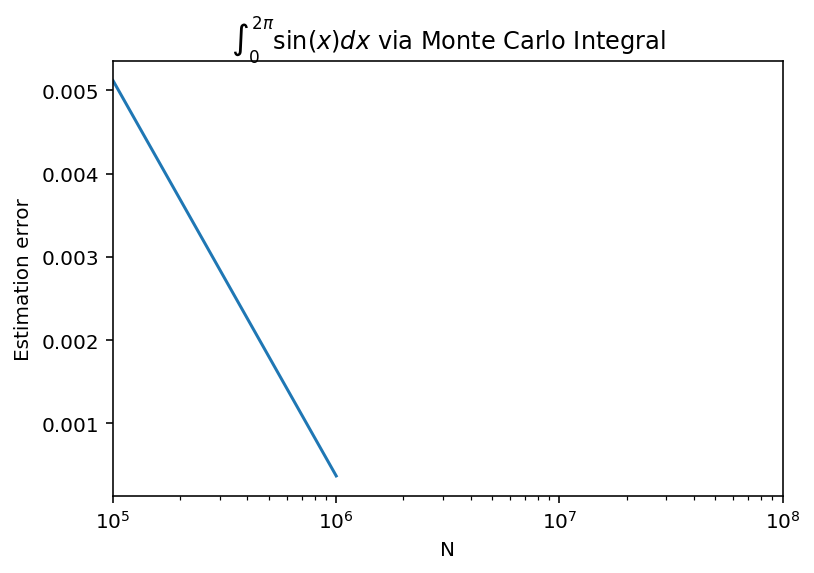

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGsN21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAWuZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcGDHx3joGa2cKryqDNdSlMQnn5bcHLMxFJCGD
aIHQaHeSKZKi6DN6oegDtToFhl26eRe+34xFMOSzDmF9f9uonlrtSgtwkeF+uC+HFETJGn37l2bc
qcZeUkanMQTh5SvN98wEwHnQuEYDPywJAFguhsDRTqlsAV0U4VQbYZ3/Vyf8p4qvzJL4xswNys9l
ibYSwlJhlFh/tyZMN5ggSJ0JU++dpdsJjB8YNV+4ZuTFCtKl06I/APpqYW9GEZ0CwpxVFLDu5TPA
YPoLhntcHAytih9PeTWukuaujAZTJL19QIy9d0y3zkk9MtevM0/y1tKBx7OXS/WNLKU8C08Gym19
qINhIbJgYrB1+34Nh4ZfzQ46rsRmipqsbGaWWOivNwmIvFy85T9h5tSTxfnfIt8bkVbFx0E7AAR4
VBkj2aTqyj3OzQxKKdhuP/FmcQybVDh5eMVbcd7CaBL3dlMVR2Ufph+coN7QQ2s65JTM9na+TbOA
/t7YCK8W3hBDcdPpfg2Xl79+G83SnrZr+VkV4bacz5OAbr5aX04LtdR61Rq1SK59p90PELI0r22Q
yY89wgwaVRXxc6XvFF54NWix49mFR1iDi+9xLoU2IPJZVy6dGRjMuHmt3guijIRBpUpNulmH6dUl
M3PNhkN6fERmyo47JnQ4AiPFGPrEep1fDyH1MU2PyUvAn5RZPbSiDGnVKdAjzCdcPvjK0CpY5PAq
vqiQzbh84X5PjFhuMzovFtDC7ZiiHkJuTGNH0+VNTqdh/K05zOxcas/T0sU7M+GKGo+f0AnfAqOK
CX6qh48ragvl09Yc32Chg4xh/1pXwjfJlUGcunaTgYRJ2/lXs6xFyRo8vMsc5A5pkYfc6MfcIK3p
1tnKyF2Wc71okfB66hi4FrazXR2W1hniIOzK6VPem7dJybSOzNbdcexpHKf5h0txZLkgV1NO44zx
UphlWSxCY18qJJIVn5/0BNJJNWAhVC7IBIyfzrzveqxKsNWsvW9TGl2wII9IHaMGewm/R3oWhHDV
a3VQMA1Ef0dIMxe2c1pd8/rhifMi41Tl7fY/zmjxdX1ktz+RlvQ/IMnMCm3f7UHOI6pbi1MO7vFQ
HaDMIkHxHSdbhMVBpkBEdsLmdU/B4ez2o/s9Ffu6fbG83+xPF4NGxdhfTaoVkJu2kLyTEoidm5zw
jyEwfGWF+WhByCGniaF3+vSi/98jPm02dxqOHEn8AkBV/Zq2V9TZpGp4+dj3AU6etyBbwT3Ni6M0
9JNG0AGyWT2q+HC9xjAL/64X1HeC/PjiQw+rMH2ypjkieAgsQx146gpyfbgf053NWr98XtZE/4h6
J/rN6WlPF6r7KV96HkRAHp7eoKbc+JTzCnUWjhlAo7pSv8E1lEDOIRsv1By8TDz5f76XFd3ktC2l
nK7qNRq/xRjFhtoY3vg0hkkAgQA0GoCbzcUAAAFLQZokbEM//p4QZ2x3OmV6XqrCBaATDKat8wpK
/Ptd/KUnqXPtildxx3TROBlPaa2s/ZqYUjKD5pF5VE73h4L+ydP1ZiGqmdN2i+fbVMvFrpxn68vE
dc6yPXGZuFM6b0zj6oZlctIkP4QrYQxXjfeNaa8OsOOImNtSXgucseCwDxEReeUx4V9+heDnuB8q
UVndOZu5b/S/McoYsSvWI7HZsqYmhejDjrFkU7QZxsbnfAqXw2KbKLU8eSRxdhiaus5hQPHejEB0
7MPRQmFtROWSknuHTkas2BXAoY37cJG/dtlKvPT5fGixVwEcN1yKCqhyR3vx3IiaUJVupisaZ+Xm
zNrBR4oL1ryhdftSHTOEvILw81MxLRqByzh5Epy+VscTyVkrMGL80ASdvxnzX0HlR4Mq0ahNzsfg
8ujet5v8CwrMnjuG5Ezt83T5ywAAAI9BnkJ4hH8EfdddaltupEr5C1h4vgvM2DGYcUisDTpYBG9q
Hc8wycg88wf60m8xmx72IFTrqlUBktkvWW/+m+AE7ZXpa6WzJzGPxByDLPxlBKWAqbcZS+7UqeUJ
ideIXOU58uQjrxW8XPUjWsDUoKWiwzgRguVD+RF6lcsWeBBsze7wgjasnVDKyUefZ3dQZwAAAFEB
nmF0R/8H68xB5FovL/sAAAMAAG0SdqmWDv+VB9VDYgqADaBP4IcuSd/HcL7/J8yXFMhRFIMmar+k
DbmabPBt1K5eiKxwF5GfTXWkTZxJOukAAABtAZ5jakf/B+27qsCv60N6bCQAAAMAUQlMsIEuQt9S
4AEAAhkYTaUPQSBxzjh+SQXEpjB+LNd/1ipGmIolh73PVMe59IrNY3eUv/sBHPbSZ3vxLe/M9oCa
OLUFPFmOIsw7Ed/uXNBW4CGiB6U5oQAAATdBmmhJqEFomUwIZ//+nhB/4sc8wwfKE0y0yEBZJ5zg
AAJfjaLSPpZx/t/xWaXWi

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g2 = rw.new_walk_gen(walkers=100)

In [9]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGOAW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAZIZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8if99hE4DA8etUgeNM/GoTg/s00RyBBOQwXE7Rygg8q0sj
4EWnhwrQ/VlP1i9+Dbuz+3DfcQG/M0FvmUraEa97CAHl33rvMBYuPGyNjH3PImh4hIb/vSW+gjE6
FiP/oD5K0dyjRnJVSetJybovpMwSJaRUC3YBGUEug2prbCcEtTUk7+DUBJnt8KO944/E3YSd+qjM
1xA4GrT9ltpX4pMxFJCGDaIHQaHeSKHim8cdDTRYrsPNcy7dQSrMQLOvNmESC34J0R4GXZ2KXf+w
wVtuj7PXCDnZT17dQSGh7TwoYrds7f4cKQ+OPDHW32KV6BHe0GZtJr57txWaE42ZCIMMTNF8SYwX
Vv30Q+ERThVBMP+lVmyJasPgUtKS4zPNs0jkdo0yv7dXzqx5Oduigmy0O/XZCWqkL8gqZM3eDyu1
ZPzgxYlz8QIOLWATuAJWNnu1R4tK2Z2saNKbrUq8qQF0Xd1n9peTLJz72q1JXBPZOER4XRddAv0b
Sd4uppa1PWvyrK1EzQGLbdjV3bKqzkOFx6q7kYiyIRxRPSpCvf5a2lA49m/UbKollKeDsdhaNcDW
j4NtJFmbpvoH3mSrXFOH6gC2Am9vw6dEIJS2Esa9AtdedKUq1MXm1JPF+d8i3xuRWN0ZOop+1ABa
opkHvAUJnEAuXtNevkgbQ/jjjAdALFVeaa/9xL54UfRFwtolQL4AeVYDl6LYtwc+QEviZOUf5GWP
/SaZUe0b7vFy5QQuQ2diVlLDX3DkCS1YxYCwtGTTkQF3NvKMMkE2RsaClOI6lwoG747AzUio9dp/
/ctSED5rym91sOw7n4kZ/oFXy0mpsZW6j1qjVscCQCr7pAK28hymuUSq30QYMgCUUZ0z3ii88GgC
H0ksp0gy8MZydZwQkPJnnTEC4QsXEPNbvBdFGQiDSpSbdLMP06pKZu5kJk6QpbPLeixx2TOhv+2C
pU6/nOKvV7C6hMfHMhb1HTQSixPqA19EGNOqMXpO4FnT9G+n+eav7tLHao6JDNuHzhfk+MVuxbkV
DI9UJoHN3YrR4A3gAGyOaHqnOZ2LjVn5Lox4zTzcCu8d6XZ7fAqNexX7vqNqEcvLRBesOb7BQwcY
jr60r4RvkyqDNkhVMlQB973wYtnWIuSNHmPeDnIHNMjD7hkg7hBW9Ots5WQg+lO9aJHweuugmdS4
OrEvuE5yOEHZZmiFHxJevdUlmblieuPY0jlP8w8TJ2PsoFdT05sHO+aQOjn2FllZm+vqdZ3/9ATS
STVgIVSUyASMn86873rtZoDVrL1vUxpdvCCPSB2jBnsJxaKfQgTMhMSqJBgGoget3IMXtnNaXcWK
4YnzIuNU5e38dT1c9zr6yoi298PkPyDJzApt4Z8xuGkZW5KXDu7xUB2gzRXm4oY5Pr5AGm7YfaYD
HSx5zsbpqe6Icq8/ClM4mK3viXkNHZt/ZJ7vsLsgJw+2fz01eqNzuV5CYPjLC/SZYE0FPiaF3+vS
i/9xDPm02Z3b7Bb5TFkugKirXLUUij3zj52PcBTp63IF/BPc2LozT0k0bQAbJZPar4cL590Av/rh
fUeYq8XVBOCYmrNo4rQYoJaLEMdeO3+SpzsDJSgKyum9zRtZFejFhf6zelpTxbvhilfeh5EQCZi7
qCm3PiU8wn7Fo4ZQKO6Ur1xM9TnBUI2X6c5iJh58v99Lio7yWhbSzld1GqFf3gxiw6TT6XwaCZUA
AzW2g5CjgzSBAAABbkGaJGxDP/6eEGdsdzplel6qwgWgEwymrfMKSvz7XfylJ6lz7YpXccd00TgZ
T2mtrP2amFIyg+aReVRO94eC/snT9WYhqpnTdovn21TLxa6caIonxAAqdkeR7VGK/O7wLY2J2ZYD
wGtfQFAxKbKdfst5/LwyqS0q/ag+A954mRiv+kS5S1BsPHDNrMysV3SYa4zyMe911RWExBFQelxj
ZuWb+7R+ENpC7yziPaWlI3rhNY+4TjBhfUKxltoCBv1c/rWcpwz//FupaTKdvCXe7356LVJa2naO
o8B+xzZJgWnZBIgNjdYuDrmog9x3nUFMPu+3iJTMf2zFJm2Ezl25seQ/GRwYt3B0xtTg8QC0I4LY
Xnh/PSbmRaneF3aFbzsNe049ZrKaCHVquGv2IKf0LI9/lDtW2PJCUWIK/0i46zrXimasqFsh/+y3
oztQrE1lIONJVwsvWCE1Dm7iVYaECpKH6gHJw0fVlzqL+ZE1UgAAAIpBnkJ4hH8EfdddaltupEr5
C1h4vgvM2DGYcUisDTpYBG9qHc8wycg88wf60m8xmx72IFTrqlUKqjP5sP3cHCX73ygZHj0AH7pm
f+44S7HUSK+4BAV8Qt1t0mW2PIgbrvwQj72Jq3Qo8qbhuLbaRFMRnK/nggNnbmD2517QgX7cydkn
pT1TI4y7QNEAAABKAZ5hdEf/B+vMQeRaLy/7AAADAABtEnaplmkGvGhbjJl9fr3AKRfV2c0gM8fg
AE4zE3z0o4vONsGlJc0mp